# Simple Implementation of Naive bayes on Pima Indian Dataset

Naive bayes <u>assumes that the presence of one feature is unrelated to presence of any other feature, even if they depend on each other.</u>

Naive bayes is useful for large datasets .

In [19]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This dataset describes the medical records for Pima Indians and whether or not each patient will have an onset of diabetes within ve years. <br>

Fields description follow:<br>

preg = Number of times pregnant<br>

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test<br>

pres = Diastolic blood pressure (mm Hg)<br>

skin = Triceps skin fold thickness (mm)<br>

test = 2-Hour serum insulin (mu U/ml)<br>

mass = Body mass index (weight in kg/(height in m)^2)<br>

pedi = Diabetes pedigree function<br>

age = Age (years)<br>

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [12]:
columns = ['preg','plas','pres','skin','test','mass',\
           'pedi','age','class']
# loading the dataset
df = pd.read_csv("pima-indians-diabetes.csv",names = columns)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# printing shape of dataframe
print(df.shape)
df.info()

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Hence, there are no missing values

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


From the above table, we will realise that cloumns like 
plas (Plasma glucose concentration a 2 hours in an oral glucose tolerance test )<br>,pres (Diastolic blood pressure (mm Hg)), skin (Triceps skin fold thickness (mm)),<br> test( 2-Hour serum insulin (mu U/ml)), mass( Body mass index (weight in kg/(height in m)^2)) can never be zero.<br>
Hence we will have to replace it with some value.

In [15]:
print(df[df['plas'] == 0].shape)
print(df[df['pres'] == 0].shape)
print(df[df['skin'] == 0].shape)
print(df[df['test'] == 0].shape)
print(df[df['mass'] == 0].shape)
print(df[['plas','pres','skin','test','mass']].median())

(5, 9)
(35, 9)
(227, 9)
(374, 9)
(11, 9)
plas    117.0
pres     72.0
skin     23.0
test     30.5
mass     32.0
dtype: float64


In [16]:
# replacing the zero values with the median
df[['plas','pres','skin','test','mass']] = df[['plas','pres','skin','test','mass']].apply(lambda x: x.replace(0,x.median()))

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


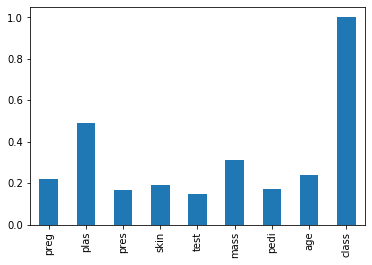

In [18]:
# checking the pairwise correlation with the class attribute
df.corr()['class'].plot(kind = 'bar')

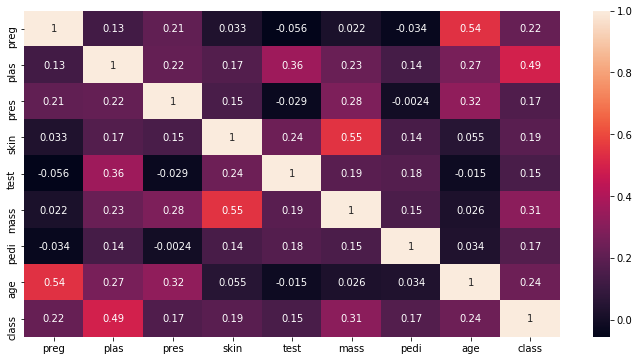

In [21]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(),annot = True)

In [22]:
# segregating dependent and independent variables
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
# splitting into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,\
stratify = Y, test_size = 0.3,random_state=42)

In [28]:
from sklearn.naive_bayes import GaussianNB

# instantiating 
gaussian = GaussianNB()

# fitting the model
gaussian.fit(X_train,Y_train)

# predicting using x_test
Y_pred = gaussian.predict(X_test)

# computing score of the model
acc_gaussian = round(gaussian.score(X_train, Y_train)*100,2)

In [29]:
print(acc_gaussian)

75.79
